<a href="https://colab.research.google.com/github/stormA4ka/hw/blob/master/Copy_of_%D0%9D%D0%BE%D1%8F%D0%B1%D1%80%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_Pro_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_1_%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание рукописных цифр из набора данных MNIST с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential #НС прямого распространения
from tensorflow.keras.layers import Dense #Полносвязные слой
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [2]:
#Загрузка данных Mnist
#x_train_org - входные картинки, обучающая выбрка
#y_train_org - выходные индексы, обучающая выборка
#x_test_org - входные картинки, тестовая выбрка
#y_test_org - выходные индексы, тестовая выборка
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


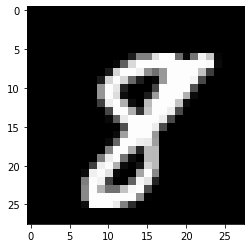

In [6]:
n = 55 #Номер картинки

#Отрисовка картинки
#Image.fromarray - создание картинки по массиву
#.convert('RGBA') - преобразование в RGBA формат
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGBA'))
plt.show()

**Преобразование размерности данных в наборе**

In [0]:
#Меняем формат входных картинок с 28х28 на 784х1
#Это нужно для удобства работы с полносвязным слоем (Dense)
#С двумерной картинкой мы будем работать в будущем с помощью свёрточных сетей
#Функция .reshape меняет размер массива
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

**Нормализация данных**

In [0]:
#Нормализуем входные картинки
#НС лучше работают, если данные нормаваны от 0 до 1
#Сейчас значения во входных картинках от 0 до 255
#Надо разделить картинки на 255
#И сначала преобразовать картинки в тип float (цифры с плавающей точкой)
x_train = x_train.astype('float32') / 255
#x_train = x_train / 255
x_test = x_test.astype('float32') / 255
#x_test = x_test / 255

**Работа с правильными ответами**

In [16]:
#Выводим пример индекса в выходных данных
print(y_train_org[n])

8


**Преобразуем метки в формат one hot encoding**

In [0]:
#НС сложно работать с чистыми индексами от 0 до 9
#Ей проще работать с данными в формате one hot encoding
#Это формат из 10 цифр - все 0 и одна 1 там, где правильный ответ
#Например
#Индекс 0 - это [1 0 0 0 0 0 0 0 0 0]
#Индекс 2 - это [0 0 1 0 0 0 0 0 0 0]
#Индекс 9 - это [0 0 0 0 0 0 0 0 0 1]
#Это делается функцией utils.to_categorical()
#Второй параметр - это количество классов, у нас - 10
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

**Правильный ответ в формате one hot encoding**

In [22]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [23]:
#Выводим пример одного выходного вектора
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
#Создаём сеть прямого распространения
#Пока она пустая
#Подробнее на https://keras.io/models/sequential/
model = Sequential()

**Добавляем уровни сети**


In [0]:
#Добавляем в сеть полносвязные слои
#Dense - полносвязный слой, подробнее на https://keras.io/layers/core/
#Первый парамерт - количество нейронок, обычно от 2 до 2000, подбирается в ходе исследования
#input_dim - размер входного вектора, указывается только в первом слое сети
#activation - активационная функция нейронов данного слоя
#relu - одна из активационных функций, подробнее на https://keras.io/activations/
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(400, activation="relu"))

#Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
#activation="softmax" - активационная функция, 
#которая делает сумму всех значений нейронов слой, равной 1
#Подробнее https://keras.io/activations/
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [29]:
#Нейронку надо "скомпилировать"
#При компиляции мы задаём несколько параметров
#loss - функция ошибки, которую оптимизирует сеть
#categorical_crossentropy - одна из функций ошибки, подходящая для классификации нескольких классов, подробнее https://keras.io/activations/
#optimizer - алгоритм обучения НС
#adam - один из алгоритмов обучения НС, подробнее https://keras.io/optimizers/
#metrics - метрика качества обучения, измеряется после каждой эпохи обучения
#accuracy - метрика, процент правильно распознанных примеров, подробнее https://keras.io/metrics/
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Вывод структуры нейронки
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
_________________________________________________________________
dense_3 (Dense)              (None, 800)               8800      
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
_________________________________________________________________
dense_6 (Dense)              (None, 800)               8

## Обучаем нейронную сеть

In [0]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка, перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выбрки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
#validation_split - процент данных, на которых сеть не обучается, на которых мы измеряем точность распознавания
model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 2s 37us/sample - loss: 0.2741 - acc: 0.9215 - val_loss: 0.1359 - val_acc: 0.9624
Epoch 2/30
48000/48000 [==============================] - 2s 35us/sample - loss: 0.1082 - acc: 0.9685 - val_loss: 0.1056 - val_acc: 0.9680
Epoch 3/30
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0678 - acc: 0.9803 - val_loss: 0.0898 - val_acc: 0.9740
Epoch 4/30
48000/48000 [==============================] - 2s 35us/sample - loss: 0.0481 - acc: 0.9856 - val_loss: 0.0787 - val_acc: 0.9770
Epoch 5/30
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0334 - acc: 0.9906 - val_loss: 0.0758 - val_acc: 0.9787
Epoch 6/30
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0232 - acc: 0.9936 - val_loss: 0.0735 - val_acc: 0.9783
Epoch 7/30
48000/48000 [==============================] - 2s 36us/sample - loss: 0.0170 - acc: 0.9957 - val_loss: 0.

## Сохраняем обученную нейронную сеть

Записываем обученную нейронную сеть в файл `mnist_dense.h5`

In [0]:
#Сохраняем нейронку в файл
model.save("mnist_dense.h5")


Проверяем, что файл сохранился

In [0]:
#Выводим на экран список текущих файлов
!ls

mnist_dense.h5	sample_data


**Сохраняем файлы на локальный компьютер**

In [0]:
#Скачиваем файл локально на компьютер
files.download("mnist_dense.h5")

Если хотите использовать обученную нейронную сеть на своем компьютере:

```
from keras.models import load_model
model = load_model('mnist_dense.h5')
```

## Используем сеть для распознавания рукописных цифр

In [0]:
#Номер тестовой цифры, которую будем распознавать
n_rec = 1779

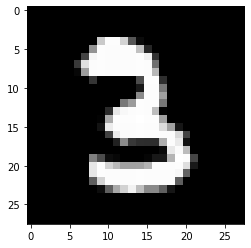

In [0]:
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA'))
plt.show()

**Меняем размерность изображения и нормализуем его**

In [0]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массов примеров для распознавания
#Мы делаем массив из одного примеры
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [0]:
#Распознаём ннаш пример
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [0]:
#Выводим результат, это 10 цифр
#Сумма значений равна 1, так как финальный слой с активационной функций softmax
print(prediction)

[[4.7713236e-19 5.8497616e-12 2.9332009e-10 1.0000000e+00 8.0967209e-19
  1.3985324e-13 5.9154132e-22 1.7923739e-13 9.4078486e-12 1.4195101e-14]]


**Преобразуем результаты из формата one hot encoding**

In [0]:
#Получаем индекс самого большого элемента
#Это итоговая цифра, которую распознала сеть
prediction = np.argmax(prediction)
print(prediction)

3


**Печатаем правильный ответ**

In [0]:
#выводим правильный ответ, для сравнения
print(y_test_org[n_rec])

3


## Загружаем свою картинку

In [0]:
#Загружаем файл со своей рукописной цифрой
files.upload()

Saving 9.png to 9.png


{'9.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x94\x00\x00\x00\x94\x08\x02\x00\x00\x00\xfa^\x97\x83\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\x04\x02IDATx^\xed\xda\xed\x92\xdaJ\x0c\x84a\xc8\xfd\xdf3Q2\x94\xe3\xb0\xd8\xd8X\x1f\xdd\x9a~\xff\x9cMR\x95\x98y,\x19v\xcf\xfd\xf1x\xdc\x14g\xbf\x9e\xffU\x84\t\x8f8\xe1\x11\'<\xe2\x84G\x9c\xf0\x88\x13\x1eq\xc2#Nx\xc4\t\x8f8\xe1\x11\'<\xe2\x84G\x9c\xf0\x88\xa3\xfc\x91\xd0\xfd~\x7f~u\xac\xae?\xf6\xc2\xc5;+t\xaa\x1e\x9c\x88x\xa1l/Q+\xc2\xe1e\xca\xfd\x8c\xcb\x12\x08\xaf\x96m\x1d\x0ba1\x1e\x0e\xd8K\x14~\x95x\xb0rK\xe0\x84e\x9f\xf3\xf0\xe5,\xf0\x8b\xac\xc1\xa3\x90\x1b!_j\xc1\xda$\x92[\x07\xb8B\xb3\xf1H\xe5\x96\xa0\x08\t\xbe\xb7\xf9\xc5y\xc5\x1d1\xd4\xcdG\x80\xf7\xf6\xbc\xb6x\xec\xf7\xc7\x1f-_4.um\x86\xde\xb6[/$\xe2\x1f\x05\xb9-\xf2&\xafj\xe1D\x1c\xb4\xbd\x96\xaa\x97\xb3\x8e`m~\xccx\xf6\x85"\xfc\x10\xcaX\x9b\xd17\xe9\xa9\x97

Проверяем загрузку картинки

In [0]:
!ls

9.png  sample_data


Загружаем картинку из файла

In [0]:
#Указывает путь к файлу
img_path = '9.png'
#Загружаем картинку, меняем размер на 28х28, формат на оттенки серого
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

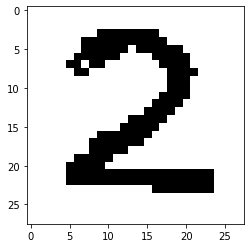

In [0]:
#Выводим картинку
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [0]:
#Преобразуем картинку в массив
x = image.img_to_array(img)
#Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
#Инвертируем изображение, нам надо белое на чёрном фоне
x = 255 - x
#Нормализуем изображение
x /= 255

Запускаем распознавание

In [0]:
#Распознаём картинку
prediction = model.predict(x)

Результаты распознавания

In [0]:
#Выводим результат
prediction

array([[5.9329127e-27, 3.1104040e-18, 1.0000000e+00, 3.7187744e-12,
        0.0000000e+00, 1.5656691e-25, 4.1536733e-28, 7.5047622e-29,
        8.3864785e-16, 1.4726752e-31]], dtype=float32)

In [0]:
#Выводим распознанную цифру
print(np.argmax(prediction))

2


#Функция быстрого теста сети

In [0]:
#Функция генерации нейронки
#neoronsL1 - нейронов в первом слое
#neuronsL2 - нейронов в втором слое, 0 - если не делать слой
#neuronsL3 - нейронов в третьем слое, 0 - если не делать слой
#innerActivation - активационная функция скрытых слоёв
#outputActivation - активационная функция выходного слоя
def createNet(neoronsL1, neuronsL2, neuronsL3, innerActivation, outputActivation):
  model = Sequential() #Создаём сеть
  model.add(Dense(neoronsL1, input_dim=784, activation=innerActivation)) #Добавляем первый слой
  
  #Если число второго слоя > 0
  #Создаём второй слой
  if (neuronsL2 > 0):
    model.add(Dense(neuronsL2, activation=innerActivation))
  
  #Если число третьего слоя > 0
  #Создаём третий слой
  if (neuronsL3 > 0):
    model.add(Dense(neuronsL3, activation=innerActivation))
    
  #Создаём выходной слой
  model.add(Dense(10, activation=outputActivation))
  
  #Компилируем сеть
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  
  #Возвращаем созданную сеть
  return model

#Обучаем и тестируем сеть
#Net - лист с 5 параметрами сети
#batch_size - размер батча
#epochs - число эпох обучения
#iterations - число запусков сети
def testModel(net, batch_size, epochs, iterations):
  acc = [] #Лист с точностями на проверочной выборке по каждому запуску
  
  #Запускаем iterations раз сеть
  for i in range(iterations):
    #Создаём сеть
    model = createNet(net[0], net[1], net[2], net[3], net[4])
    #Обучаем сеть
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.2)
    #Добавляем в лист точность на проверочной выборке на последней итерации
    acc.append(history.history["val_acc"][-1])
  
  #Возвращаем лист точностей
  return acc

In [0]:
#Запускаем тест одной нейронки 100 раз
acc = testModel([800,0,0,'relu','softmax'], 200, 10, 3)
print(acc)

In [0]:
#Отображаем результаты
print("Точность на всех запусках: ", [round(a,4) for a in acc])
print("Среднее значение точности: ", round(sum(acc)/len(acc), 4))
print("Амплитуда разброса точности: ", round(max(acc) - min(acc), 4))
print("Среднеквадратичное отклонение точности: ", round(np.array(acc).std(),6))

Точность на всех запусках:  [0.9798, 0.9791, 0.9789, 0.9795, 0.9792, 0.9802, 0.98, 0.9796, 0.9798, 0.9799, 0.98, 0.9772, 0.9792, 0.98, 0.9795, 0.9782, 0.9788, 0.98, 0.9792, 0.9789, 0.9795, 0.9789, 0.9783, 0.9779, 0.9782, 0.978, 0.9781, 0.9788, 0.9803, 0.9796, 0.9803, 0.9789, 0.9805, 0.9796, 0.978, 0.9787, 0.9778, 0.9807, 0.9794, 0.9782, 0.9779, 0.9789, 0.9789, 0.9791, 0.98, 0.9784, 0.9768, 0.9794, 0.9784, 0.9789, 0.9793, 0.9798, 0.9802, 0.9798, 0.9792, 0.9788, 0.9788, 0.9802, 0.9795, 0.9802, 0.9792, 0.9783, 0.9796, 0.9779, 0.9801, 0.977, 0.9785, 0.9781, 0.9789, 0.9784, 0.9798, 0.9802, 0.9792, 0.9796, 0.9789, 0.9798, 0.9795, 0.9781, 0.9804, 0.9795, 0.9788, 0.9808, 0.9789, 0.9793, 0.979, 0.9796, 0.9787, 0.9799, 0.9791, 0.9789, 0.9802, 0.9783, 0.9778, 0.9788, 0.9787, 0.9776, 0.979, 0.9785, 0.978, 0.9772]
Среднее значение точности:  0.9791
Амплитуда разброса точности:  0.004
Среднеквадратичное отклонение точности:  0.000848


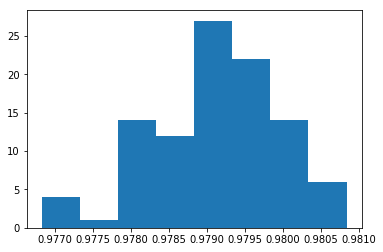

In [0]:
#Строим гистограмму точности сети
plt.hist(acc, 8)
plt.show()

**Генерируем и тестируем нейронки**

In [0]:
#Создаём 5 различных сетей
net = []
net.append([800, 0, 0, 'relu', 'softmax'])
net.append([400, 0, 0, 'relu', 'softmax'])
net.append([400, 400, 0, 'relu', 'softmax'])
net.append([800, 0, 0, 'linear', 'softmax'])
net.append([800, 0, 0, 'relu', 'sigmoid'])

In [0]:

#Обучаем каждую сеть и выводим среднюю точность на проверочной выборке по 3 запускам
for currNet in net:
  acc = testModel(currNet, 200, 10, 3)
  print(currNet, round(sum(acc)/len(acc),4))

[800, 0, 0, 'relu', 'softmax'] 0.9804
[400, 0, 0, 'relu', 'softmax'] 0.9763
[400, 400, 0, 'relu', 'softmax'] 0.9765
[800, 0, 0, 'linear', 'softmax'] 0.9221
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[800, 0, 0, 'relu', 'sigmoid'] 0.0995
